<h1><center> LH-opto

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change directory
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata/

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata


In [3]:
%run /content/drive/MyDrive/!lab/FiberPhotometryDataAnalysis.ipynb

All Fiber Photometry functions are ready to use


In [4]:
filename = 'LH-opto_dlc.h5'

In [5]:
chr2_mice = ['LHA93','LHA94','LHA95','LHA96','LHA97','LHA98','LHA99','LHA100','LHA101']
eyfp_mice = ['LHA35','LHA37','LHA38','LHA39','LHA40','LHA61','LHA104','LHA105','LHA106']
outputs = ['LHA-LHb','LHA-VTA','LHA-DRN']
tests = ['RTTP','SCT','OFT','TST']

# Save to HDF

In [9]:
folders = {'RTPP': ['/content/drive/MyDrive/!lab/Data/Kate/!Opto/2019-10 LHA-opto-3 RTPP2/raw/',
                    '/content/drive/MyDrive/!lab/Data/Kate/!Opto/2018-10-04 LHA-ChR2 RTPP/'],
            'SCT': ['/content/drive/MyDrive/!lab/Data/Kate/!Opto/2019-11-30 LHA-opto-3 ChR2 Sucrose3/raw/',
                    '/content/drive/MyDrive/!lab/Data/Kate/!Opto/2019-10 LHA-opto-3 Sucrose2/raw_eYFP/',
                    '/content/drive/MyDrive/!lab/Data/Kate/!Opto/2018-10-03 LHA-ChR2 Sucrose/'],
            'TST': ['/content/drive/MyDrive/!lab/Data/Kate/!Opto/2019-08 LHA-opto-3 TST/raw/',
                    '/content/drive/MyDrive/!lab/Data/Kate/!Opto/2018-10-09 LHA-ChR2 TST/'],
            'OFT': ['/content/drive/MyDrive/!lab/Data/Kate/!Opto/2019-08 LHA-opto-3 OFT/raw/',
                    '/content/drive/MyDrive/!lab/Data/Kate/!Opto/2018-10-26 LHA-ChR2 OFT/']}

#### Set attributes

In [ ]:
with h5py.File(filename,'a') as f:
  f.attrs['ChR2-mice'] = chr2_mice
  f.attrs['eYFP-mice'] = eyfp_mice
  f.attrs['outputs'] = outputs
  f.attrs['tests'] = tests
  f.attrs['good target'] = [['LHA93','LHA-LHb'],
                            ['LHA94','LHA-LHb'],
                            ['LHA95','LHA-LHb'],
                            ['LHA96','LHA-LHb'],
                            ['LHA97','LHA-LHb'],
                            ['LHA98','LHA-LHb'],
                            ['LHA101','LHA-LHb'],
                            ['LHA93','LHA-VTA'],
                            ['LHA94','LHA-VTA'],
                            ['LHA95','LHA-VTA'],
                            ['LHA96','LHA-VTA'],
                            ['LHA97','LHA-VTA'],
                            ['LHA98','LHA-VTA'],
                            ['LHA99','LHA-VTA'],
                            ['LHA100','LHA-VTA'],
                            ['LHA101','LHA-VTA'],
                            ['LHA93','LHA-DRN'],
                            ['LHA94','LHA-DRN'],
                            ['LHA95','LHA-DRN'],
                            ['LHA96','LHA-DRN'],
                            ['LHA97','LHA-DRN'],
                            ['LHA99','LHA-DRN'],
                            ['LHA100','LHA-DRN'],
                            ['LHA101','LHA-DRN'],
                            ['LHA35','LHA-LHb'],
                            ['LHA37','LHA-LHb'],
                            ['LHA38','LHA-LHb'],
                            ['LHA39','LHA-LHb'],
                            ['LHA40','LHA-LHb'],
                            ['LHA61','LHA-LHb'],
                            ['LHA104','LHA-LHb'],
                            ['LHA105','LHA-LHb'],
                            ['LHA106','LHA-LHb'],
                            ['LHA35','LHA-VTA'],
                            ['LHA37','LHA-VTA'],
                            ['LHA38','LHA-VTA'],
                            ['LHA39','LHA-VTA'],
                            ['LHA40','LHA-VTA'],
                            ['LHA61','LHA-VTA'],
                            ['LHA104','LHA-VTA'],
                            ['LHA105','LHA-VTA'],
                            ['LHA106','LHA-VTA'],
                            ['LHA35','LHA-DRN'],
                            ['LHA37','LHA-DRN'],
                            ['LHA38','LHA-DRN'],
                            ['LHA39','LHA-DRN'],
                            ['LHA40','LHA-DRN'],
                            ['LHA61','LHA-DRN'],
                            ['LHA104','LHA-DRN'],
                            ['LHA105','LHA-DRN'],
                            ['LHA106','LHA-DRN']]

#### RTPP

In [ ]:
rtpp_full_file_names = []
for folder in folders['RTPP']:
  files = find_files(folder,['.csv'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in chr2_mice+eyfp_mice:
      rtpp_full_file_names.append(folder+f)
#rtpp_full_file_names

In [ ]:
with h5py.File(filename,'a') as f:

  for file_ in rtpp_full_file_names:

    file_split = file_.split('/') 
    name = file_split[-1]
    folder = '/'.join(file_split[:-1])

    sepname = name.split('_')      
    mouse = sepname[0]
    output = 'LHA-'+sepname[1]

    if mouse in chr2_mice:
      group = 'ChR2'
    elif mouse in eyfp_mice:
      group = 'eYFP'
  
    df = pd.read_csv(file_)

    try:
      blue_laser_on = sum(df['Blue laser active'])
      green_laser_on = sum(df['Green laser active'])
      if blue_laser_on > 0:
        laser = np.array(df['Blue laser active'])
      else:
        continue
    except:
      blue_laser_on = sum(df['Laser blue active'])
      green_laser_on = sum(df['Laser green active'])
      if blue_laser_on > 0:
        laser = np.array(df['Laser blue active'])
      else:
        continue


    time_ = np.array(df['Time'])
    corridor = np.array(df['In Corridor'])
    chamber1 = np.array(df['In Chamber 1'])
    chamber2 = np.array(df['In Chamber 2'])


    saveToHDF(f,'RTPP/raw/'+group+'/'+output+'/'+mouse+'/time',time_)
    saveToHDF(f,'RTPP/raw/'+group+'/'+output+'/'+mouse+'/laser',laser)
    saveToHDF(f,'RTPP/raw/'+group+'/'+output+'/'+mouse+'/chamber1',chamber1)
    saveToHDF(f,'RTPP/raw/'+group+'/'+output+'/'+mouse+'/chamber2',chamber2)
    saveToHDF(f,'RTPP/raw/'+group+'/'+output+'/'+mouse+'/corridor',corridor)

    print(mouse,group,output)

LHA61 eYFP LHA-DRN
LHA61 eYFP LHA-VTA
LHA94 ChR2 LHA-LHb
LHA94 ChR2 LHA-DRN
LHA94 ChR2 LHA-VTA
LHA93 ChR2 LHA-LHb
LHA93 ChR2 LHA-VTA
LHA95 ChR2 LHA-DRN
LHA93 ChR2 LHA-DRN
LHA95 ChR2 LHA-LHb
LHA96 ChR2 LHA-DRN
LHA96 ChR2 LHA-LHb
LHA96 ChR2 LHA-VTA
LHA95 ChR2 LHA-VTA
LHA98 ChR2 LHA-DRN
LHA97 ChR2 LHA-DRN
LHA98 ChR2 LHA-LHb
LHA97 ChR2 LHA-VTA
LHA97 ChR2 LHA-LHb
LHA98 ChR2 LHA-VTA
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-LHb
LHA100 ChR2 LHA-DRN
LHA99 ChR2 LHA-VTA
LHA99 ChR2 LHA-DRN
LHA100 ChR2 LHA-VTA
LHA101 ChR2 LHA-DRN
LHA101 ChR2 LHA-LHb
LHA101 ChR2 LHA-VTA
LHA104 eYFP LHA-DRN
LHA105 eYFP LHA-VTA
LHA106 eYFP LHA-LHb
LHA37 eYFP LHA-VTA
LHA35 eYFP LHA-DRN
LHA38 eYFP LHA-VTA
LHA35 eYFP LHA-LHb
LHA40 eYFP LHA-LHb
LHA39 eYFP LHA-LHb
LHA39 eYFP LHA-DRN
LHA38 eYFP LHA-DRN
LHA37 eYFP LHA-LHb
LHA40 eYFP LHA-VTA


#### SCT

In [ ]:
sct_full_file_names = []
for folder in folders['SCT']:
  files = find_files(folder,['.csv'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in chr2_mice+eyfp_mice:
      sct_full_file_names.append(folder+f)
#sct_full_file_names

In [ ]:
with h5py.File(filename,'a') as f:

  for file_ in sct_full_file_names:

    file_split = file_.split('/') 
    name = file_split[-1]
    folder = '/'.join(file_split[:-1])

    sepname = name.split('_')      
    mouse = sepname[0]
    if mouse in ['LHA61','LHA104','LHA105','LHA106']:
      continue

    if sepname[1] in ['nostim','nostim2']:
      output = 'no-stim'
    elif sepname[1] in ['LHb','VTA','DRN']:
      output = 'LHA-'+sepname[1]
    elif sepname[1] in ['pretest3','nostim1'] :
      output = 'pre-test'
    elif sepname[1]=='posttest':
      output = 'post-test'
    else:
      continue

    if mouse in chr2_mice:
      group = 'ChR2'
    elif mouse in eyfp_mice:
      group = 'eYFP'
  
    df = pd.read_csv(file_)

    try:
      blue_laser_on = sum(df['Blue laser active'])
      green_laser_on = sum(df['Green laser active'])
      if blue_laser_on > 0:
        laser = np.array(df['Blue laser active'])
      else:
        laser = np.array(df['Green laser active'])
    except:
      blue_laser_on = sum(df['Laser blue active'])
      green_laser_on = sum(df['Laser green active'])
      if blue_laser_on > 0:
        laser = np.array(df['Laser blue active'])
      else:
        laser = np.array(df['Laser green active'])


    time_ = np.array(df['Time'])
    licks = np.array(df['Lick active'])


    saveToHDF(f,'SCT/raw/'+group+'/'+output+'/'+mouse+'/time',time_)
    saveToHDF(f,'SCT/raw/'+group+'/'+output+'/'+mouse+'/licks',licks)
    saveToHDF(f,'SCT/raw/'+group+'/'+output+'/'+mouse+'/laser',laser)

    print(mouse,group,output)

LHA100 ChR2 post-test
LHA99 ChR2 LHA-VTA
LHA94 ChR2 post-test
LHA96 ChR2 post-test
LHA98 ChR2 LHA-VTA
LHA101 ChR2 LHA-DRN
LHA100 ChR2 LHA-LHb
LHA98 ChR2 post-test
LHA95 ChR2 post-test
LHA99 ChR2 post-test
LHA96 ChR2 LHA-LHb
LHA100 ChR2 LHA-VTA
LHA101 ChR2 LHA-LHb
LHA95 ChR2 no-stim
LHA94 ChR2 LHA-LHb
LHA95 ChR2 LHA-VTA
LHA96 ChR2 no-stim
LHA99 ChR2 no-stim
LHA94 ChR2 LHA-DRN
LHA98 ChR2 LHA-DRN
LHA101 ChR2 no-stim
LHA99 ChR2 LHA-DRN
LHA95 ChR2 LHA-LHb
LHA96 ChR2 LHA-DRN
LHA100 ChR2 no-stim
LHA98 ChR2 no-stim
LHA94 ChR2 LHA-VTA
LHA101 ChR2 LHA-VTA
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-DRN
LHA98 ChR2 LHA-LHb
LHA100 ChR2 pre-test
LHA99 ChR2 pre-test
LHA95 ChR2 LHA-DRN
LHA101 ChR2 pre-test
LHA96 ChR2 LHA-VTA
LHA94 ChR2 no-stim
LHA96 ChR2 pre-test
LHA98 ChR2 pre-test
LHA95 ChR2 pre-test
LHA94 ChR2 pre-test
LHA101 ChR2 post-test
LHA37 eYFP LHA-DRN
LHA38 eYFP LHA-VTA
LHA35 eYFP LHA-VTA
LHA39 eYFP LHA-DRN
LHA39 eYFP LHA-VTA
LHA40 eYFP LHA-DRN
LHA35 eYFP LHA-DRN
LHA38 eYFP LHA-LHb
LHA37 eYFP LHA-LH

#### TST

In [7]:
# with h5py.File(filename,'a') as f:
#   # del f['TST']
#   print(list(f))

['OFT']


In [10]:
tst_full_file_names = []
for folder in folders['TST']:
  files = find_files(folder,['anymaze.csv'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in chr2_mice+eyfp_mice:
      tst_full_file_names.append(folder+f)
# tst_full_file_names

In [11]:
with h5py.File(filename,'a') as f:

  for file_ in tst_full_file_names:

    file_split = file_.split('/') 
    name = file_split[-1]
    folder = '/'.join(file_split[:-1])

    sepname = name.split('_')      
    mouse = sepname[0]
    output = 'LHA-'+sepname[1]
    if mouse in chr2_mice:
      group = 'ChR2'
    elif mouse in eyfp_mice:
      group = 'eYFP'
  
    df = pd.read_csv(file_)
    time_ = np.array(df['Time'])
    try:
      blue_laser_on = sum(df['Blue laser active'])
      green_laser_on = sum(df['Green laser active'])
      if blue_laser_on > 0:
        laser = np.array(df['Blue laser active'])
      elif green_laser_on > 0:
        laser = np.array(df['Green laser active'])
      else:
        continue
    except:
      blue_laser_on = sum(df['Laser blue active'])
      green_laser_on = sum(df['Laser green active'])
      if blue_laser_on > 0:
        laser = np.array(df['Laser blue active'])
      elif green_laser_on > 0:
        laser = np.array(df['Laser green active'])
      else:
        continue

    dl = np.diff(laser)
    laser_switch = [i+1 for i,val in enumerate(dl) if val != 0]
    laser_switch.append(len(time_)-1)
    laser_switch = [0] + laser_switch
    time_laser_switch = [time_[i] for i in laser_switch]

    folder_dlc = '/content/drive/MyDrive/!lab/Data/Kate/DeepLabCut/LHtst-Kate-2021-06-25/videos/'
    network = 'DLC_resnet50_LHtstJun25shuffle1_157000';file_dlc = find_files(folder_dlc, [mouse,sepname[1],network,'h5'])[0]  
    df_dlc = pd.read_hdf(folder_dlc+'/'+file_dlc, 'df_with_missing')
    x_body = np.array(df_dlc[(network, 'body', 'x')])
    y_body = np.array(df_dlc[(network, 'body', 'y')])

   # Video time
    import imageio
    file_video = find_files(folder_dlc, [mouse,sepname[1],'mp4'])[0]
    reader = imageio.get_reader(folder_dlc+file_video)
    fps = reader.get_meta_data()['fps']
    time_pose = np.arange(0,len(x_body)/fps,1/fps)
    if int(time_pose[-1]) % 10 == 5:
      i0 = int(round(5*fps))
      x_body = x_body[i0:]; y_body = y_body[i0:]
      time_pose = time_pose[i0:]; time_pose = time_pose - 5
    time_pose = time_pose[:len(x_body)]
    speed_body = get_speed(x_body,np.zeros(y_body.size),time_pose)
    speed_body,time_body = remove_outliers(speed_body,time_pose)
    movement_body = np.interp(speed_body, (np.nanmin(speed_body),np.nanmax(speed_body)), (0,1))

    saveToHDF(f,'TST/raw/'+group+'/'+output+'/'+mouse+'/time',time_body)
    saveToHDF(f,'TST/raw/'+group+'/'+output+'/'+mouse+'/movement',movement_body)
    saveToHDF(f,'TST/raw/'+group+'/'+output+'/'+mouse+'/laser-switch',time_laser_switch)
    saveToHDF(f,'TST/raw/'+group+'/'+output+'/'+mouse+'/fps',fps)

    print(mouse,group,output)

LHA61 eYFP LHA-DRN
LHA61 eYFP LHA-VTA
LHA61 eYFP LHA-LHb
LHA93 ChR2 LHA-LHb
LHA94 ChR2 LHA-DRN
LHA94 ChR2 LHA-VTA
LHA93 ChR2 LHA-DRN
LHA93 ChR2 LHA-VTA
LHA95 ChR2 LHA-DRN
LHA98 ChR2 LHA-DRN
LHA95 ChR2 LHA-LHb
LHA94 ChR2 LHA-LHb
LHA97 ChR2 LHA-VTA
LHA95 ChR2 LHA-VTA
LHA96 ChR2 LHA-VTA
LHA96 ChR2 LHA-DRN
LHA97 ChR2 LHA-DRN
LHA97 ChR2 LHA-LHb
LHA96 ChR2 LHA-LHb
LHA98 ChR2 LHA-LHb
LHA101 ChR2 LHA-DRN
LHA101 ChR2 LHA-LHb
LHA101 ChR2 LHA-VTA
LHA99 ChR2 LHA-DRN
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-LHb
LHA100 ChR2 LHA-VTA
LHA98 ChR2 LHA-VTA
LHA105 eYFP LHA-DRN
LHA105 eYFP LHA-LHb
LHA100 ChR2 LHA-DRN
LHA104 eYFP LHA-VTA
LHA104 eYFP LHA-DRN
LHA105 eYFP LHA-VTA
LHA106 eYFP LHA-DRN
LHA106 eYFP LHA-LHb
LHA106 eYFP LHA-VTA
LHA99 ChR2 LHA-VTA
LHA35 eYFP LHA-LHb
LHA35 eYFP LHA-VTA
LHA35 eYFP LHA-DRN
LHA37 eYFP LHA-VTA
LHA37 eYFP LHA-DRN
LHA37 eYFP LHA-LHb
LHA38 eYFP LHA-DRN
LHA38 eYFP LHA-LHb
LHA38 eYFP LHA-VTA
LHA39 eYFP LHA-LHb
LHA39 eYFP LHA-VTA
LHA39 eYFP LHA-DRN
LHA40 eYFP LHA-VTA
LHA40 eYFP LHA-DR

#### OFT

In [30]:
oft_full_file_names = []
for folder in folders['OFT']:
  files = find_files(folder,['anymaze.csv'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in chr2_mice+eyfp_mice:
      oft_full_file_names.append(folder+f)
# oft_full_file_names

In [31]:
with h5py.File(filename,'a') as f:

  for file_ in oft_full_file_names:

    file_split = file_.split('/') 
    name = file_split[-1]
    folder = '/'.join(file_split[:-1])

    sepname = name.split('_')      
    mouse = sepname[0]
    if mouse in ['LHA35','LHA37','LHA38','LHA40']: output = 'LHA-'+sepname[1]
    else: output = sepname[2]
    if mouse in chr2_mice:
      group = 'ChR2'
    elif mouse in eyfp_mice:
      group = 'eYFP'
  
    df = pd.read_csv(file_)
    time_ = np.array(df['Time'])
    try:
      blue_laser_on = sum(df['Blue laser active'])
      green_laser_on = sum(df['Green laser active'])
      if blue_laser_on > 0:
        laser = np.array(df['Blue laser active'])
      elif green_laser_on > 0:
        laser = np.array(df['Green laser active'])
      else:
        continue
    except:
      blue_laser_on = sum(df['Laser blue active'])
      green_laser_on = sum(df['Laser green active'])
      if blue_laser_on > 0:
        laser = np.array(df['Laser blue active'])
      elif green_laser_on > 0:
        laser = np.array(df['Laser green active'])
      else:
        continue

    dl = np.diff(laser)
    laser_switch = [i+1 for i,val in enumerate(dl) if val != 0]
    laser_switch.append(len(time_)-1)
    laser_switch = [0] + laser_switch
    time_laser_switch = [time_[i] for i in laser_switch]

    folder_dlc = '/content/drive/MyDrive/!lab/Data/Kate/DeepLabCut/LHoft-Kate-2021-06-25/videos/'
    file_dlc = find_files(folder_dlc, [mouse,output[-3:],'DLC_resnet50_LHoftJun25shuffle1_109500','h5'])[0]
    df_dlc = pd.read_hdf(folder_dlc+'/'+file_dlc, 'df_with_missing')
    x_body = np.array(df_dlc[('DLC_resnet50_LHoftJun25shuffle1_109500', 'body', 'x')])
    y_body = np.array(df_dlc[('DLC_resnet50_LHoftJun25shuffle1_109500', 'body', 'y')])

   # Video time
    import imageio
    file_video = find_files(folder_dlc, [mouse,sepname[1],'mp4'])[0]
    reader = imageio.get_reader(folder_dlc+file_video)
    fps = reader.get_meta_data()['fps']
    time_pose = np.arange(0,len(x_body)/fps,1/fps)
    if int(time_pose[-1]) % 10 == 5:
      i0 = int(round(5*fps))
      x_body = x_body[i0:]; y_body = y_body[i0:]
      time_pose = time_pose[i0:]; time_pose = time_pose - 5
    time_pose = time_pose[:len(x_body)]
    speed_body = get_speed(x_body,y_body,time_pose)
    speed_body,time_body = remove_outliers(speed_body,time_pose)
    movement_body = np.interp(speed_body, (np.nanmin(speed_body),np.nanmax(speed_body)), (0,1))

    saveToHDF(f,'OFT/raw/'+group+'/'+output+'/'+mouse+'/time',time_body)
    saveToHDF(f,'OFT/raw/'+group+'/'+output+'/'+mouse+'/movement',movement_body)
    saveToHDF(f,'OFT/raw/'+group+'/'+output+'/'+mouse+'/laser-switch',time_laser_switch)
    saveToHDF(f,'OFT/raw/'+group+'/'+output+'/'+mouse+'/fps',fps)

    print(mouse,group,output,file_dlc)

LHA93 ChR2 LHA-DRN LHA93_DRN_OFT_1DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA93 ChR2 LHA-LHb LHA93_LHb_OFT_2DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA93 ChR2 LHA-VTA LHA93_VTA_OFT_3DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA94 ChR2 LHA-VTA LHA94_VTA_OFT_1DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA94 ChR2 LHA-DRN LHA94_DRN_OFT_2DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA94 ChR2 LHA-LHb LHA94_LHb_OFT_3DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA95 ChR2 LHA-LHb LHA95_LHb_OFT_1DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA95 ChR2 LHA-DRN LHA95_DRN_OFT_3DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA96 ChR2 LHA-DRN LHA96_DRN_OFT_1DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA96 ChR2 LHA-VTA LHA96_VTA_OFT_2DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA96 ChR2 LHA-LHb LHA96_LHb_OFT_3DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA97 ChR2 LHA-VTA LHA97_VTA_OFT_1DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA97 ChR2 LHA-LHb LHA97_LHb_OFT_2DLC_resnet50_LHoftJun25shuffle1_109500.h5
LHA97 ChR2 L

# Process

#### RTPP

In [ ]:
with h5py.File(filename,'a') as f:

  for group in f['RTPP/raw']:
    for output in f['RTPP/raw/'+group]:

      mice = []
      scores = []
      durations = []
      entrances = []

      for mouse in f['RTPP/raw/'+group+'/'+output]:

        print(mouse,group,output)

        path = 'RTPP/raw/'+group+'/'+output+'/'+mouse
        time_ = np.array(f[path+'/time'])
        laser = np.array(f[path+'/laser'])
        chamber1 = np.array(f[path+'/chamber1'])
        chamber2 = np.array(f[path+'/chamber2'])
        corridor = np.array(f[path+'/corridor'])
        
        laser_on = event_onoffset(laser,time_)
        duration_laser_on = laser_on[:,1] - laser_on[:,0]
        stim_duration = sum(duration_laser_on)
        nostim_duration = time_[-1] - stim_duration

        score = (stim_duration - nostim_duration) / time_[-1]

        mice.append(mouse)
        scores.append(score)
        durations.append(np.mean(duration_laser_on))
        entrances.append(len(duration_laser_on))

      path = 'RTPP/processed/'+group+'/'+output+'/'
      saveToHDF(f,path+'mice',np.array(mice,dtype=h5py.string_dtype(encoding='utf-8')))
      saveToHDF(f,path+'score',scores)
      saveToHDF(f,path+'duration',durations)
      saveToHDF(f,path+'entrance',entrances)

LHA100 ChR2 LHA-DRN
LHA101 ChR2 LHA-DRN
LHA93 ChR2 LHA-DRN
LHA94 ChR2 LHA-DRN
LHA95 ChR2 LHA-DRN
LHA96 ChR2 LHA-DRN
LHA97 ChR2 LHA-DRN
LHA98 ChR2 LHA-DRN
LHA99 ChR2 LHA-DRN
LHA100 ChR2 LHA-LHb
LHA101 ChR2 LHA-LHb
LHA93 ChR2 LHA-LHb
LHA94 ChR2 LHA-LHb
LHA95 ChR2 LHA-LHb
LHA96 ChR2 LHA-LHb
LHA97 ChR2 LHA-LHb
LHA98 ChR2 LHA-LHb
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-VTA
LHA101 ChR2 LHA-VTA
LHA93 ChR2 LHA-VTA
LHA94 ChR2 LHA-VTA
LHA95 ChR2 LHA-VTA
LHA96 ChR2 LHA-VTA
LHA97 ChR2 LHA-VTA
LHA98 ChR2 LHA-VTA
LHA99 ChR2 LHA-VTA
LHA104 eYFP LHA-DRN
LHA35 eYFP LHA-DRN
LHA38 eYFP LHA-DRN
LHA39 eYFP LHA-DRN
LHA61 eYFP LHA-DRN
LHA106 eYFP LHA-LHb
LHA35 eYFP LHA-LHb
LHA37 eYFP LHA-LHb
LHA39 eYFP LHA-LHb
LHA40 eYFP LHA-LHb
LHA105 eYFP LHA-VTA
LHA37 eYFP LHA-VTA
LHA38 eYFP LHA-VTA
LHA40 eYFP LHA-VTA
LHA61 eYFP LHA-VTA


#### SCT

In [ ]:
with h5py.File(filename,'a') as f:

  for group in f['SCT/raw']:
    for output in f['SCT/raw/'+group]:

      mice = []
      numbers = []
      durations = []
      intervals = []
      frequencies = []
      total_durations = []
      licks_total_numbers = []

      for mouse in f['SCT/raw/'+group+'/'+output]:

        print(mouse,group,output,end=' ')

        path = 'SCT/raw/'+group+'/'+output+'/'+mouse
        laser = np.array(f[path+'/laser'])
        licks = np.array(f[path+'/licks'])  
        time_ = np.array(f[path+'/time'])
        
        if output in ['LHA-LHb','LHA-VTA','LHA-DRN'] and group=='ChR2':
          laser_on = event_onoffset(laser,time_)
            
        consumption = event_onoffset(licks,time_)

        if len(consumption)!=0:
          consumption = adjust_intervals_durations(consumption,1,0.5)

        # Remove licks without stimulation
          if output in ['LHA-LHb','LHA-VTA','LHA-DRN'] and group=='ChR2':
            delete = []
            for i in range(len(consumption)):
              i0 = find_idx(consumption[i,0],time_)
              i1 = find_idx(consumption[i,1],time_)
              if sum(laser[i0:i1])==0:
                delete.append(i)
            consumption = np.delete(consumption, delete, axis=0)
          
          duration = [consumption[i,1]-consumption[i,0] for i in range(len(consumption))]
          interval = [consumption[i+1,0]-consumption[i,1] for i in range(len(consumption)-1)]
          
          frequency = []
          for i in range(len(consumption)):
            i0 = find_idx(consumption[i,0],time_)
            i1 = find_idx(consumption[i,1],time_)
            fr = sum(licks[i0:i1]) / (duration[i])
            frequency.append(fr)
          
          number = len(duration)
          mean_duration = np.mean(duration)
          mean_interval = np.mean(interval)
          mean_frequency = np.mean(frequency)
          total_duration = sum(duration)
          licks_total_number = sum(licks)

        else:
          number = 0
          mean_duration = 0
          mean_interval = 0
          mean_frequency = 0
          total_duration = 0
          licks_total_number = 0
                    
        mice.append(mouse)
        numbers.append(1.0*number)
        durations.append(mean_duration)
        intervals.append(mean_interval)
        frequencies.append(mean_frequency)
        total_durations.append(total_duration)
        licks_total_numbers.append(1.0*licks_total_number)

        print('done.')

      path = 'SCT/processed/'+group+'/'+output+'/'
      saveToHDF(f,path+'mice',np.array(mice,dtype=h5py.string_dtype(encoding='utf-8')))
      saveToHDF(f,path+'number',numbers)
      saveToHDF(f,path+'duration',durations)
      saveToHDF(f,path+'interval',intervals) 
      saveToHDF(f,path+'frequency',frequencies)
      saveToHDF(f,path+'total duration',total_durations)
      saveToHDF(f,path+'total licks',licks_total_numbers)     

LHA100 ChR2 LHA-DRN done.
LHA101 ChR2 LHA-DRN done.
LHA94 ChR2 LHA-DRN done.
LHA95 ChR2 LHA-DRN done.
LHA96 ChR2 LHA-DRN 

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


done.
LHA98 ChR2 LHA-DRN done.
LHA99 ChR2 LHA-DRN done.
LHA100 ChR2 LHA-LHb done.
LHA101 ChR2 LHA-LHb done.
LHA94 ChR2 LHA-LHb done.
LHA95 ChR2 LHA-LHb done.
LHA96 ChR2 LHA-LHb done.
LHA98 ChR2 LHA-LHb done.
LHA99 ChR2 LHA-LHb done.
LHA100 ChR2 LHA-VTA done.
LHA101 ChR2 LHA-VTA done.
LHA94 ChR2 LHA-VTA done.
LHA95 ChR2 LHA-VTA done.
LHA96 ChR2 LHA-VTA done.
LHA98 ChR2 LHA-VTA done.
LHA99 ChR2 LHA-VTA done.
LHA100 ChR2 no-stim done.
LHA101 ChR2 no-stim done.
LHA94 ChR2 no-stim done.
LHA95 ChR2 no-stim done.
LHA96 ChR2 no-stim done.
LHA98 ChR2 no-stim done.
LHA99 ChR2 no-stim done.
LHA100 ChR2 post-test done.
LHA101 ChR2 post-test done.
LHA94 ChR2 post-test done.
LHA95 ChR2 post-test done.
LHA96 ChR2 post-test done.
LHA98 ChR2 post-test done.
LHA99 ChR2 post-test done.
LHA100 ChR2 pre-test done.
LHA101 ChR2 pre-test done.
LHA94 ChR2 pre-test done.
LHA95 ChR2 pre-test done.
LHA96 ChR2 pre-test done.
LHA98 ChR2 pre-test done.
LHA99 ChR2 pre-test done.
LHA35 eYFP LHA-DRN done.
LHA37 eYFP LH

In [ ]:
with h5py.File(filename,'a') as f:

  group  = 'ChR2'
  for measure in ['number','duration','interval','frequency','total duration','total licks']:

    pretest = 1.0 * np.array(f['SCT/processed/'+group+'/pre-test/'+measure])
    posttest = 1.0 * np.array(f['SCT/processed/'+group+'/post-test/'+measure])
    norm = (pretest+posttest) / 2.0

    for output in f['SCT/processed/'+group]:

      path = 'SCT/processed/'+group+'/'+output+'/'+measure
      stim = 1.0 * np.array(f[path])

      norm_stim = stim / norm

      saveToHDF(f,path,np.array(norm_stim,dtype='float64'))


  group = 'eYFP'
  for measure in ['number','duration','interval','frequency','total duration','total licks']:

    norm = 1.0 * np.array(f['SCT/processed/'+group+'/pre-test/'+measure])

    for output in f['SCT/processed/'+group]:

      path = 'SCT/processed/'+group+'/'+output+'/'+measure
      stim = 1.0 * np.array(f[path])

      norm_stim = stim / norm

      saveToHDF(f,path,np.array(norm_stim,dtype='float64'))

#### TST

In [18]:
with h5py.File(filename,'a') as f:

  for group in f['TST/raw']:
    for output in f['TST/raw/'+group]:

        mice = []
        total_score = []
        total_speed = []
        bout_score = []
        duration = []
        number = []

        for mouse in f['TST/raw/'+group+'/'+output]:
          path = 'TST/raw/'+group+'/'+output+'/'+mouse+'/'
          time_ = np.array(f[path+'/time'])
          speed = np.array(f[path+'/movement'])
          time_laser_switch = np.array(f[path+'laser-switch'])
          fps = np.array(f[path+'fps'])


          T = int(fps)
          speed = smooth_signal(speed,T)

          idx_immobile = find_onoffset_immobility(speed,time_,0.5,0.05,0.1,output='index'); 
          idx_mobile = convert_onoffset(idx_immobile,len(time_)-1)

          immobile = find_onoffset_immobility(speed,time_,0.5,0.05,0.1);
          mobile = convert_onoffset(immobile,time_[-1],time_[0])
          
          idx_laser_switch = [find_idx(t,time_) for t in time_laser_switch]

          # fig = plt.figure(figsize=(25,10))
          # ax = fig.add_subplot(111)
          # ax.set_title(mouse+' '+output+' TST '+body_part+'-speed')
          # ax.plot(time_,speed,color='red')
          # ax.set_ylim([0,1])
          # for i in range(int(len(time_laser_switch)/2)):
          #   ax.axvspan(time_laser_switch[2*i+1],time_laser_switch[2*(i+1)],0,1,alpha=0.2)
          # for on,off in mobile:
          #   ax.axvspan(on,off,0,1,color='magenta',alpha=0.2)
          # ax.set_xlim(time_[0],time_[-1])
          # ax1 = ax.twinx()
          # ax1.plot(time_am,speed_am)
          # ax1.set_ylim([-0.4,0.4])
          # fig.savefig('figures/'+mouse+'_'+output+'_TST_'+body_part+'-speed.pdf')
          # plt.close()

          period_duration = [0] * 10
          period_number = [0] * 10
          period_bout_score = [0] * 10
          period_total_score = [0] * 10
          period_total_speed = [0] * 10
          for l in range(len(time_laser_switch)-1):
            chunk = []
            for on,off,i_on,i_off in np.c_[mobile,idx_mobile]:
              i_on = int(i_on); i_off = int(i_off)
              if on < time_laser_switch[l] and (time_laser_switch[l] < off <= time_laser_switch[l+1]):
                period_duration[l] = period_duration[l] + (off-time_laser_switch[l])/120
                period_number[l] = period_number[l] + 1
                chunk.extend(speed[idx_laser_switch[l]:i_off])
              elif time_laser_switch[l] <= on < time_laser_switch[l+1]:
                if off > time_laser_switch[l+1]:
                  period_duration[l] = period_duration[l] + (time_laser_switch[l+1]-on)/120
                  period_number[l] = period_number[l] + 1
                  chunk.extend(speed[i_on:idx_laser_switch[l+1]])
                  break
                else: 
                  period_duration[l] = period_duration[l] + (off-on)/120
                  period_number[l] = period_number[l] + 1
                  chunk.extend(speed[i_on:i_off])
            period_bout_score[l] = np.nanmean(chunk)
            period_total_score[l] = np.nanmean(speed[idx_laser_switch[l]:idx_laser_switch[l+1]])

          mice.append(mouse)
          duration.append(period_duration)
          number.append(period_number)
          bout_score.append(period_bout_score)
          total_score.append(period_total_score)        

          print(mouse,group,output)

        path = 'TST/byperiod/'+group+'/'+output+'/'
        saveToHDF(f,path+'mean-movement',total_score)
        saveToHDF(f,path+'bout-movement',bout_score)
        saveToHDF(f,path+'bout-total-duration',duration)
        saveToHDF(f,path+'bout-mean-duration',np.array(duration)*120/np.array(number))
        saveToHDF(f,path+'bout-number',number)
        saveToHDF(f,path+'timeperiods',range(0,20,2))
        saveToHDF(f,path+'mice',np.array(mice,dtype=h5py.string_dtype(encoding='utf-8')))

LHA100 ChR2 LHA-DRN
LHA101 ChR2 LHA-DRN
LHA93 ChR2 LHA-DRN
LHA94 ChR2 LHA-DRN
LHA95 ChR2 LHA-DRN
LHA96 ChR2 LHA-DRN
LHA97 ChR2 LHA-DRN
LHA98 ChR2 LHA-DRN
LHA99 ChR2 LHA-DRN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide


LHA100 ChR2 LHA-LHb
LHA101 ChR2 LHA-LHb
LHA93 ChR2 LHA-LHb
LHA94 ChR2 LHA-LHb
LHA95 ChR2 LHA-LHb
LHA96 ChR2 LHA-LHb
LHA97 ChR2 LHA-LHb
LHA98 ChR2 LHA-LHb
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-VTA
LHA101 ChR2 LHA-VTA
LHA93 ChR2 LHA-VTA
LHA94 ChR2 LHA-VTA
LHA95 ChR2 LHA-VTA
LHA96 ChR2 LHA-VTA
LHA97 ChR2 LHA-VTA
LHA98 ChR2 LHA-VTA
LHA99 ChR2 LHA-VTA
LHA104 eYFP LHA-DRN
LHA105 eYFP LHA-DRN
LHA106 eYFP LHA-DRN
LHA35 eYFP LHA-DRN
LHA37 eYFP LHA-DRN
LHA38 eYFP LHA-DRN
LHA39 eYFP LHA-DRN
LHA40 eYFP LHA-DRN
LHA61 eYFP LHA-DRN
LHA105 eYFP LHA-LHb
LHA106 eYFP LHA-LHb
LHA35 eYFP LHA-LHb
LHA37 eYFP LHA-LHb
LHA38 eYFP LHA-LHb
LHA39 eYFP LHA-LHb
LHA40 eYFP LHA-LHb
LHA61 eYFP LHA-LHb
LHA104 eYFP LHA-VTA
LHA105 eYFP LHA-VTA
LHA106 eYFP LHA-VTA
LHA35 eYFP LHA-VTA
LHA37 eYFP LHA-VTA
LHA38 eYFP LHA-VTA
LHA39 eYFP LHA-VTA
LHA40 eYFP LHA-VTA
LHA61 eYFP LHA-VTA


#### OFT

In [33]:
with h5py.File(filename,'a') as f:

  for group in f['OFT/raw']:
    for output in f['OFT/raw/'+group]:

        mice = []
        total_score = []
        total_speed = []
        bout_score = []
        duration = []
        number = []

        for mouse in f['OFT/raw/'+group+'/'+output]:
          path = 'OFT/raw/'+group+'/'+output+'/'+mouse+'/'
          time_ = np.array(f[path+'time'])
          speed = np.array(f[path+'movement'])
          time_laser_switch = np.array(f[path+'laser-switch'])
          fps = np.array(f[path+'fps'])


          T = int(fps)
          speed = smooth_signal(speed,T)

          idx_immobile = find_onoffset_immobility(speed,time_,0.5,0.05,0.1,output='index'); 
          idx_mobile = convert_onoffset(idx_immobile,len(time_)-1)

          immobile = find_onoffset_immobility(speed,time_,0.5,0.05,0.1);
          mobile = convert_onoffset(immobile,time_[-1],time_[0])
          
          idx_laser_switch = [find_idx(t,time_) for t in time_laser_switch]

          # fig = plt.figure(figsize=(25,10))
          # ax = fig.add_subplot(111)
          # ax.set_title(mouse+' '+output+' TST '+body_part+'-speed')
          # ax.plot(time_,speed,color='red')
          # ax.set_ylim([0,1])
          # for i in range(int(len(time_laser_switch)/2)):
          #   ax.axvspan(time_laser_switch[2*i+1],time_laser_switch[2*(i+1)],0,1,alpha=0.2)
          # for on,off in mobile:
          #   ax.axvspan(on,off,0,1,color='magenta',alpha=0.2)
          # ax.set_xlim(time_[0],time_[-1])
          # ax1 = ax.twinx()
          # ax1.plot(time_am,speed_am)
          # ax1.set_ylim([-0.4,0.4])
          # fig.savefig('figures/'+mouse+'_'+output+'_TST_'+body_part+'-speed.pdf')
          # plt.close()

          period_duration = [0] * 10
          period_number = [0] * 10
          period_bout_score = [0] * 10
          period_total_score = [0] * 10
          period_total_speed = [0] * 10
          for l in range(len(time_laser_switch)-1):
            chunk = []
            for on,off,i_on,i_off in np.c_[mobile,idx_mobile]:
              i_on = int(i_on); i_off = int(i_off)
              if on < time_laser_switch[l] and (time_laser_switch[l] < off <= time_laser_switch[l+1]):
                period_duration[l] = period_duration[l] + (off-time_laser_switch[l])/120
                period_number[l] = period_number[l] + 1
                chunk.extend(speed[idx_laser_switch[l]:i_off])
              elif time_laser_switch[l] <= on < time_laser_switch[l+1]:
                if off > time_laser_switch[l+1]:
                  period_duration[l] = period_duration[l] + (time_laser_switch[l+1]-on)/120
                  period_number[l] = period_number[l] + 1
                  chunk.extend(speed[i_on:idx_laser_switch[l+1]])
                  break
                else: 
                  period_duration[l] = period_duration[l] + (off-on)/120
                  period_number[l] = period_number[l] + 1
                  chunk.extend(speed[i_on:i_off])
            period_bout_score[l] = np.nanmean(chunk)
            period_total_score[l] = np.nanmean(speed[idx_laser_switch[l]:idx_laser_switch[l+1]])

          mice.append(mouse)
          duration.append(period_duration)
          number.append(period_number)
          bout_score.append(period_bout_score)
          total_score.append(period_total_score)        

          print(mouse,group,output)

        path = 'OFT/byperiod/'+group+'/'+output+'/'
        saveToHDF(f,path+'mean-movement',total_score)
        saveToHDF(f,path+'bout-movement',bout_score)
        saveToHDF(f,path+'bout-total-duration',duration)
        saveToHDF(f,path+'bout-mean-duration',np.array(duration)*120/np.array(number))
        saveToHDF(f,path+'bout-number',number)
        saveToHDF(f,path+'timeperiods',range(0,20,2))
        saveToHDF(f,path+'mice',np.array(mice,dtype=h5py.string_dtype(encoding='utf-8')))

LHA100 ChR2 LHA-DRN
LHA101 ChR2 LHA-DRN
LHA93 ChR2 LHA-DRN
LHA94 ChR2 LHA-DRN
LHA95 ChR2 LHA-DRN
LHA96 ChR2 LHA-DRN
LHA97 ChR2 LHA-DRN
LHA98 ChR2 LHA-DRN
LHA99 ChR2 LHA-DRN
LHA100 ChR2 LHA-LHb
LHA101 ChR2 LHA-LHb
LHA93 ChR2 LHA-LHb
LHA94 ChR2 LHA-LHb
LHA95 ChR2 LHA-LHb
LHA96 ChR2 LHA-LHb
LHA97 ChR2 LHA-LHb
LHA98 ChR2 LHA-LHb
LHA99 ChR2 LHA-LHb
LHA100 ChR2 LHA-VTA
LHA101 ChR2 LHA-VTA
LHA93 ChR2 LHA-VTA
LHA94 ChR2 LHA-VTA
LHA96 ChR2 LHA-VTA


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide


LHA97 ChR2 LHA-VTA
LHA98 ChR2 LHA-VTA
LHA99 ChR2 LHA-VTA
LHA104 eYFP LHA-DRN
LHA105 eYFP LHA-DRN
LHA106 eYFP LHA-DRN
LHA35 eYFP LHA-DRN
LHA37 eYFP LHA-DRN
LHA38 eYFP LHA-DRN
LHA40 eYFP LHA-DRN
LHA61 eYFP LHA-DRN
LHA104 eYFP LHA-LHb
LHA105 eYFP LHA-LHb
LHA106 eYFP LHA-LHb
LHA35 eYFP LHA-LHb
LHA37 eYFP LHA-LHb
LHA38 eYFP LHA-LHb
LHA40 eYFP LHA-LHb
LHA61 eYFP LHA-LHb
LHA104 eYFP LHA-VTA
LHA105 eYFP LHA-VTA
LHA106 eYFP LHA-VTA
LHA35 eYFP LHA-VTA
LHA37 eYFP LHA-VTA
LHA38 eYFP LHA-VTA
LHA40 eYFP LHA-VTA
LHA61 eYFP LHA-VTA


# Plot results

#### Functions

In [12]:
def plot_preference_score(file_,plot_type='violinplot',points=False,
                          figsize=(3.5,3),save=False,imgname='plot.pdf'):
  
  mice = []
  scores = []
  groups = []
  outputs = []

  with h5py.File(file_,'r') as f:

    goodTarget = (f.attrs['good target']).tolist()

    for group in ['eYFP','ChR2']:
      for output in ['LHA-DRN','LHA-VTA','LHA-LHb']:

        score = list(f['RTPP/processed/'+group+'/'+output+'/score'])
        mouse = list(f['RTPP/processed/'+group+'/'+output+'/mice'])

        delete = [i for i in range(len(score)) if score[i] in [0,np.nan]]

        if len(goodTarget) != 0 and output != 'no-stim':
          for i in range(len(mouse)):
            if [mouse[i],output] not in goodTarget:
              delete.append(i)

        mouse = [mouse[i] for i in range(len(mouse)) if i not in delete]
        score = [score[i] for i in range(len(score)) if i not in delete]

        n = len(score)
        mice.extend(mouse)
        scores.extend(score)
        groups.extend([group]*n)
        outputs.extend([output]*n)

  df = pd.DataFrame({'mouse': mice,
                     'group': groups,
                    'output': outputs,
                     'score': scores})
  
  fig = plt.figure(figsize=figsize)
  sns.set_style('ticks')

  ax = fig.add_subplot()
  if plot_type=='violinplot':
    sns.violinplot(x='group',y='score',hue='output',data=df,
                palette=['purple','blue','red'],width=1)
  if plot_type=='boxplot':
    sns.boxplot(x='group',y='score',hue='output',data=df,
                palette=['purple','blue','red'])
  if points:
    sns.swarmplot(x='group',y='score',hue='output',data=df,
                  color='black',dodge=True)
  
  ax.set_xlabel('')
  ax.set_ylabel('Preference score')
  ax.set_ylim([-1,1])
  ax.set_yticks([-1,0,1])

  plt.legend([],[], frameon=False)

  sns.despine()
  plt.subplots_adjust(hspace=0)
  plt.tight_layout()

  if save:
    fig.savefig(imgname)

  return df

In [13]:
def plot_consumption_measure(file_,measure,plot_type='violinplot',points=False,
                             ylabel=None,ylim=None,yticks=None,
                             figsize=(5,3),save=False,imgname='plot.pdf'):
  
  mice = []
  measurements = []
  groups = []
  outputs = []

  with h5py.File(file_,'r') as f:

    goodTarget = (f.attrs['good target']).tolist()

    for group in f['SCT/processed/']:
      for output in ['no-stim','LHA-DRN','LHA-VTA','LHA-LHb']:

        path = 'SCT/processed/'+group+'/'+output+'/'+measure
        measurement = list(f['SCT/processed/'+group+'/'+output+'/'+measure])
        mouse = list(f['SCT/processed/'+group+'/'+output+'/mice'])

        delete = [i for i in range(len(measurement)) if measurement[i] in [0,np.nan]]

        if len(goodTarget) != 0 and output != 'no-stim':
          for i in range(len(mouse)):
            if [mouse[i],output] not in goodTarget:
              delete.append(i)

        mouse = [mouse[i] for i in range(len(mouse)) if i not in delete]
        measurement = [measurement[i] for i in range(len(measurement)) if i not in delete]

        n = len(measurement)
        mice.extend(mouse)
        measurements.extend(measurement)
        groups.extend([group]*n)
        outputs.extend([output]*n)

  df = pd.DataFrame({'mouse': mice,
                     'group': groups,
                    'output': outputs,
                   'measure': measurements})
  
  chr2 = df[df.group=='ChR2']
  eyfp = df[df.group=='eYFP']

  fig = plt.figure(figsize=figsize)
  sns.set_style('ticks')

  ax1 = fig.add_subplot(121)
  ax1.title.set_text('ChR2')
  if plot_type=='violinplot':
    sns.violinplot(x='output',y='measure',data=chr2,ax=ax1,
                order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'],
                palette=['grey','purple','blue','red'],width=1,linewidth=0.5)
  elif plot_type=='boxplot':
    sns.boxplot(x='output',y='measure',data=chr2,ax=ax1,
                order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'],
                palette=['grey','purple','blue','red'])
  if points:
    sns.swarmplot(x='output',y='measure',data=chr2,ax=ax1,color='black',
                  order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'])
  
  ax1.set_xlabel('')
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=25)

  ax2 = fig.add_subplot(122)
  ax2.title.set_text('eYFP')
  if plot_type=='violinplot':
    sns.violinplot(x='output',y='measure',data=eyfp,ax=ax2,
                order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'],
                palette=['grey','purple','blue','red'],width=1,linewidth=0.5)
  elif plot_type=='boxplot':
    sns.boxplot(x='output',y='measure',data=eyfp,ax=ax2,
                order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'],
                palette=['grey','purple','blue','red'])
  if points:
    sns.swarmplot(x='output',y='measure',data=eyfp,ax=ax2,color='black',
                  order=['no-stim','LHA-DRN','LHA-VTA','LHA-LHb'])
  
  ax2.set_xlabel('')
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25)
  ax2.set_ylabel('')
  ax2.set_yticklabels([])

  if ylabel is not None:
    ax1.set_ylabel(ylabel)
  if ylim is not None:
    ax1.set_ylim(ylim)
    ax2.set_ylim(ylim)
  if yticks is not None:
    ax1.set_yticks(yticks)
    ax2.set_yticks(yticks)

  sns.despine()
  
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1)

  if save:
    fig.savefig(imgname)

  return df

In [14]:
def plot_movement_byperiods(file_,measure,test,group,output,individual_lines=False,
                            color='black',laser_color='blue',
                            ylim=None,yticks=None,
                            figsize=(4.5,3),save=False,imgname='plot.pdf'):

  import seaborn as sns
  from matplotlib import gridspec

  with h5py.File(file_,'r') as f:
    movement = np.array(f[test+'/byperiod/'+group+'/'+output+'/'+measure])
    mice = np.array(f[test+'/byperiod/'+group+'/'+output+'/mice'])
  
  column_names = ['period1-OFF','period1-ON','period2-OFF','period2-ON','period3-OFF','period3-ON','period4-OFF','period4-ON','period5-OFF','period5-ON']
  df = pd.DataFrame(data=movement,columns=column_names)
  df['mouse'] = mice
  df = df.melt(id_vars='mouse',value_vars=column_names)
  new = df['variable'].str.split('-',n = 1, expand = True)
  df['period'] = new[0]
  df['laser'] = new[1]
  df.drop(columns=['variable'], inplace=True)
  df['group'] = [group]*len(new[0])
  df['test'] = [test]*len(new[0])
  df['output'] = [output[-3:]]*len(new[0])

  x = list(range(1,20,2))
  mean,error = calculate_mean_error(movement)


  fig = plt.figure(figsize=figsize)
  sns.set_style('ticks')
  gs = gridspec.GridSpec(1, 2, width_ratios=[5,1])
  ax = fig.add_subplot(gs[0])

  ax.errorbar(x,mean,yerr=error,color=color,capthick=1,linewidth=2)
  if individual_lines:
    for trial in range(len(movement)):
        sns.lineplot(x,movement[trial],color=color,alpha=0.3)

  for i in range(5):
      ax.axvspan(2*(2*i+1), 4*(i+1), alpha=0.3, color=laser_color)

  ax.set_ylabel('Mobility score (AU)',size='large')
  ax.set_xlabel('Time (s)',size='large')

  ax.set_xlim([0,20])
  ax.xaxis.set_ticks(range(0,21,2))

  if ylim is not None:
    ax.set_ylim(ylim)
  if yticks is not None:
    ax.set_yticks(yticks)

  ax1 = fig.add_subplot(gs[1])
  sns.lineplot(x='laser',y='value',data=df,ax=ax1,
               err_style="bars", ci=68,color=color)
  ax1.axvspan(0.5, 1.5, alpha=0.3, color=laser_color)

  ax1.set_xlim([-0.5,1.5])
  ax1.set_yticklabels([])
  if ylim is not None:
    ax1.set_ylim(ylim)
  if yticks is not None:
    ax1.set_yticks(yticks)

  ax1.set_xlabel('')
  ax1.set_ylabel('')
  ax1.set_xticklabels(['OFF','ON'],size='large',rotation=40)

  sns.despine()
  plt.tight_layout()

  if save:
    fig.savefig(imgname)

  return df

In [15]:
def plot_movement_byperiods_all(file_,measure,test,group,individual_lines=False,
                            color='black',laser_color='blue',
                            ylim=None,yticks=None,ytitle='Mobility score (AUC)',
                            figsize=(4.5,3),save=False,imgname='plot.pdf'):

  import seaborn as sns
  from matplotlib import gridspec

  with h5py.File(file_,'r') as f:
    movement_drn = np.array(f[test+'/byperiod/'+group+'/LHA-DRN/'+measure])
    mice_drn = np.array(f[test+'/byperiod/'+group+'/LHA-DRN/mice'])
  column_names = ['period1-OFF','period1-ON','period2-OFF','period2-ON','period3-OFF','period3-ON','period4-OFF','period4-ON','period5-OFF','period5-ON']
  df_drn = pd.DataFrame(data=movement_drn,columns=column_names)
  df_drn['mouse'] = mice_drn
  df_drn = df_drn.melt(id_vars='mouse',value_vars=column_names)
  new = df_drn['variable'].str.split('-',n = 1, expand = True)
  df_drn['period'] = new[0]
  df_drn['laser'] = new[1]
  df_drn.drop(columns=['variable'], inplace=True)
  df_drn['group'] = [group]*len(new[0])
  df_drn['test'] = [test]*len(new[0])
  df_drn['output'] = ['DRN']*len(new[0])

  with h5py.File(file_,'r') as f:
    movement_vta = np.array(f[test+'/byperiod/'+group+'/LHA-VTA/'+measure])
    mice_vta = np.array(f[test+'/byperiod/'+group+'/LHA-VTA/mice'])
  column_names = ['period1-OFF','period1-ON','period2-OFF','period2-ON','period3-OFF','period3-ON','period4-OFF','period4-ON','period5-OFF','period5-ON']
  df_vta = pd.DataFrame(data=movement_vta,columns=column_names)
  df_vta['mouse'] = mice_vta
  df_vta = df_vta.melt(id_vars='mouse',value_vars=column_names)
  new = df_vta['variable'].str.split('-',n = 1, expand = True)
  df_vta['period'] = new[0]
  df_vta['laser'] = new[1]
  df_vta.drop(columns=['variable'], inplace=True)
  df_vta['group'] = [group]*len(new[0])
  df_vta['test'] = [test]*len(new[0])
  df_vta['output'] = ['VTA']*len(new[0])

  with h5py.File(file_,'r') as f:
    movement_lhb = np.array(f[test+'/byperiod/'+group+'/LHA-LHb/'+measure])
    mice_lhb = np.array(f[test+'/byperiod/'+group+'/LHA-LHb/mice'])
  column_names = ['period1-OFF','period1-ON','period2-OFF','period2-ON','period3-OFF','period3-ON','period4-OFF','period4-ON','period5-OFF','period5-ON']
  df_lhb = pd.DataFrame(data=movement_lhb,columns=column_names)
  df_lhb['mouse'] = mice_lhb
  df_lhb = df_lhb.melt(id_vars='mouse',value_vars=column_names)
  new = df_lhb['variable'].str.split('-',n = 1, expand = True)
  df_lhb['period'] = new[0]
  df_lhb['laser'] = new[1]
  df_lhb.drop(columns=['variable'], inplace=True)
  df_lhb['group'] = [group]*len(new[0])
  df_lhb['test'] = [test]*len(new[0])
  df_lhb['output'] = ['LHb']*len(new[0])

  df = pd.concat([df_drn,df_vta,df_lhb])

  x = list(range(1,20,2))
  mean_drn,error_drn = calculate_mean_error(movement_drn)
  mean_vta,error_vta = calculate_mean_error(movement_vta)
  mean_lhb,error_lhb = calculate_mean_error(movement_lhb)


  fig = plt.figure(figsize=figsize)
  sns.set_style('ticks')
  gs = gridspec.GridSpec(1, 2, width_ratios=[5,1])
  ax = fig.add_subplot(gs[0])

  ax.errorbar(x,mean_drn,yerr=error_drn,color='purple',capthick=1,linewidth=2)
  ax.errorbar(x,mean_vta,yerr=error_vta,color='blue',capthick=1,linewidth=2)
  ax.errorbar(x,mean_lhb,yerr=error_lhb,color='red',capthick=1,linewidth=2)
  if individual_lines:
    for trial in range(len(movement)):
        sns.lineplot(x,movement[trial],color=color,alpha=0.3)

  for i in range(5):
      ax.axvspan(2*(2*i+1), 4*(i+1), alpha=0.3, color=laser_color)

  ax.set_ylabel(ytitle,size='large')
  ax.set_xlabel('Time (s)',size='large')

  ax.set_xlim([0,20])
  ax.xaxis.set_ticks(range(0,21,2))

  if ylim is not None:
    ax.set_ylim(ylim)
  if yticks is not None:
    ax.set_yticks(yticks)

  ax1 = fig.add_subplot(gs[1])
  sns.lineplot(x='laser',y='value',data=df_drn,ax=ax1,err_style="bars",ci=68,color='purple',linewidth=2)
  sns.lineplot(x='laser',y='value',data=df_vta,ax=ax1,err_style="bars",ci=68,color='blue',linewidth=2)
  sns.lineplot(x='laser',y='value',data=df_lhb,ax=ax1,err_style="bars",ci=68,color='red',linewidth=2)
  ax1.axvspan(0.5, 1.5, alpha=0.3, color=laser_color)

  ax1.set_xlim([-0.5,1.5])
  ax1.set_yticklabels([])
  if ylim is not None:
    ax1.set_ylim(ylim)
  if yticks is not None:
    ax1.set_yticks(yticks)

  ax1.set_xlabel('')
  ax1.set_ylabel('')
  ax1.set_xticklabels(['OFF','ON'],size='large',rotation=40)

  sns.despine()
  plt.tight_layout()

  if save:
    fig.savefig(imgname)

  return df

In [16]:
def plot_movement_parameters_all(file_,measure,test,group,individual_lines=False,
                            color='black',laser_color='blue',
                            ylim=None,yticks=None,ytitle='Mobility score (AU)',
                            figsize=(2,3),save=False,imgname='plot.pdf'):

  import seaborn as sns
  from matplotlib import gridspec

  with h5py.File(file_,'r') as f:
    movement_drn = np.array(f[test+'/byperiod/'+group+'/LHA-DRN/'+measure])
    mice_drn = np.array(f[test+'/byperiod/'+group+'/LHA-DRN/mice'])
  column_names = ['period1-OFF','period1-ON','period2-OFF','period2-ON','period3-OFF','period3-ON','period4-OFF','period4-ON','period5-OFF','period5-ON']
  df_drn = pd.DataFrame(data=movement_drn,columns=column_names)
  df_drn['mouse'] = mice_drn
  df_drn = df_drn.melt(id_vars='mouse',value_vars=column_names)
  new = df_drn['variable'].str.split('-',n = 1, expand = True)
  df_drn['period'] = new[0]
  df_drn['laser'] = new[1]
  df_drn.drop(columns=['variable'], inplace=True)
  df_drn['group'] = [group]*len(new[0])
  df_drn['test'] = [test]*len(new[0])
  df_drn['output'] = ['DRN']*len(new[0])

  with h5py.File(file_,'r') as f:
    movement_vta = np.array(f[test+'/byperiod/'+group+'/LHA-VTA/'+measure])
    mice_vta = np.array(f[test+'/byperiod/'+group+'/LHA-VTA/mice'])
  column_names = ['period1-OFF','period1-ON','period2-OFF','period2-ON','period3-OFF','period3-ON','period4-OFF','period4-ON','period5-OFF','period5-ON']
  df_vta = pd.DataFrame(data=movement_vta,columns=column_names)
  df_vta['mouse'] = mice_vta
  df_vta = df_vta.melt(id_vars='mouse',value_vars=column_names)
  new = df_vta['variable'].str.split('-',n = 1, expand = True)
  df_vta['period'] = new[0]
  df_vta['laser'] = new[1]
  df_vta.drop(columns=['variable'], inplace=True)
  df_vta['group'] = [group]*len(new[0])
  df_vta['test'] = [test]*len(new[0])
  df_vta['output'] = ['VTA']*len(new[0])

  with h5py.File(file_,'r') as f:
    movement_lhb = np.array(f[test+'/byperiod/'+group+'/LHA-LHb/'+measure])
    mice_lhb = np.array(f[test+'/byperiod/'+group+'/LHA-LHb/mice'])
  column_names = ['period1-OFF','period1-ON','period2-OFF','period2-ON','period3-OFF','period3-ON','period4-OFF','period4-ON','period5-OFF','period5-ON']
  df_lhb = pd.DataFrame(data=movement_lhb,columns=column_names)
  df_lhb['mouse'] = mice_lhb
  df_lhb = df_lhb.melt(id_vars='mouse',value_vars=column_names)
  new = df_lhb['variable'].str.split('-',n = 1, expand = True)
  df_lhb['period'] = new[0]
  df_lhb['laser'] = new[1]
  df_lhb.drop(columns=['variable'], inplace=True)
  df_lhb['group'] = [group]*len(new[0])
  df_lhb['test'] = [test]*len(new[0])
  df_lhb['output'] = ['LHb']*len(new[0])

  df = pd.concat([df_drn,df_vta,df_lhb])

  x = list(range(1,20,2))
  mean_drn,error_drn = calculate_mean_error(movement_drn)
  mean_vta,error_vta = calculate_mean_error(movement_vta)
  mean_lhb,error_lhb = calculate_mean_error(movement_lhb)


  fig = plt.figure(figsize=figsize)
  sns.set_style('ticks')
  ax = fig.add_subplot()
  ax.axvspan(0.5, 1.5, alpha=0.3, color=laser_color)
  #sns.barplot(x="laser", y="value", hue="output", data=df, ci=68, 
  #            palette=('purple','blue','red'),errcolor="0",edgecolor="none")
  sns.lineplot(x='laser',y='value',hue='output',data=df,err_style='bars',ci=68,
               palette=('purple','blue','red'),linewidth=2)
  # sns.lineplot(x='laser',y='value',data=df_drn,err_style="bars",ci=68,color='purple',linewidth=2)
  # sns.lineplot(x='laser',y='value',data=df_vta,err_style="bars",ci=68,color='blue',linewidth=2)
  # sns.lineplot(x='laser',y='value',data=df_lhb,err_style="bars",ci=68,color='red',linewidth=2)
  
  ax.set_xlim([-0.5,1.5])
  if ylim is not None:
    ax.set_ylim(ylim)
  if yticks is not None:
    ax.set_yticks(yticks)

  ax.set_xlabel('')
  ax.set_ylabel(ytitle,size='large')
  ax.legend([],[], frameon=False)
  ax.set_xticklabels(['OFF','ON'],size='large',rotation=40)

  sns.despine()
  plt.tight_layout()

  if save:
    fig.savefig(imgname)

  return df

In [17]:
def calculate_mean_error(data,error='SEM',confidence=0.95):

  import scipy

  a = 1.0 * np.array(data)
  n = len(a)
  m = np.mean(a,axis=0)
  if np.isnan(m.sum()):
    m = np.nanmean(a,axis=0)
    print('There are missing values.')
  se = scipy.stats.sem(a,axis=0,nan_policy='omit')
  ci = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

  if error=='SEM':
    e = se
  if error=='CI':
    e = ci
  
  return m, e

#### RTPP

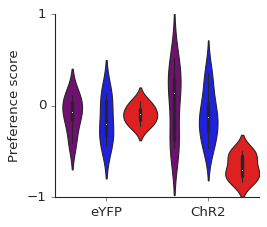

In [ ]:
rtpp = plot_preference_score(filename)
plt.show()

In [ ]:
writer = pd.ExcelWriter('../sourcedata/fig7_LHopto_RTPP-SCT.xlsx', engine='xlsxwriter')

In [ ]:
rtpp.to_excel(writer,sheet_name='RTPP',index=False)

Check if second session with food powder on the floor changed behaviour.

#### SCT

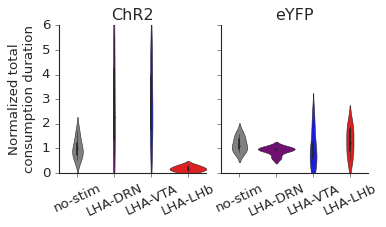

In [ ]:
dur = plot_consumption_measure(filename,'total duration',ylabel='Normalized total\nconsumption duration',ylim=[0,6])
plt.show()

In [ ]:
dur.to_excel(writer,sheet_name='SCTtotalDuration',index=False)

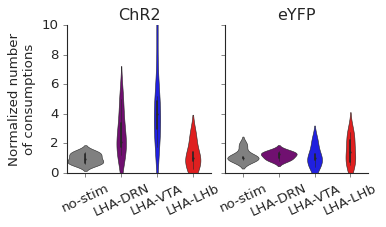

In [ ]:
number = plot_consumption_measure(filename,'number',ylabel='Normalized number\nof consumptions',ylim=[0,10])
plt.show()

In [ ]:
number.to_excel(writer,sheet_name='SCTnumber',index=False)

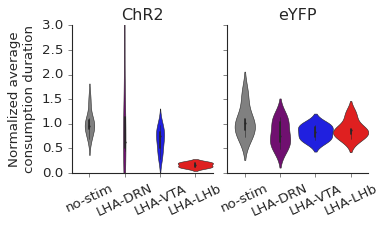

In [ ]:
avgDur = plot_consumption_measure(filename,'duration',ylabel='Normalized average\nconsumption duration',ylim=[0,3])
plt.show()

In [ ]:
avgDur.to_excel(writer,sheet_name='SCTavgDuration',index=False)

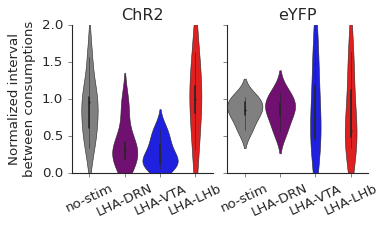

In [ ]:
interval = plot_consumption_measure(filename,'interval',ylabel='Normalized interval\nbetween consumptions',ylim=[0,2])
plt.show()

In [ ]:
interval.to_excel(writer,sheet_name='SCTinterval',index=False)

In [ ]:
writer.save()

#### TST

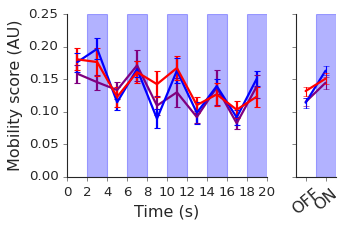

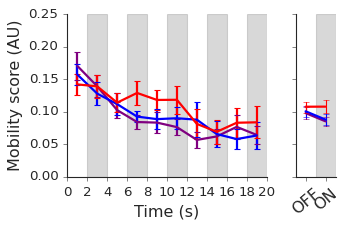

In [24]:
tst_chr2 = plot_movement_byperiods_all(filename,'mean-movement','TST','ChR2',color='purple',ylim=[0,0.25],ytitle='Mobility score (AU)',
                                       save=True,imgname='plots/TSTopto_ChR2_total.pdf')
tst_eyfp = plot_movement_byperiods_all(filename,'mean-movement','TST','eYFP',color='purple',laser_color='grey',ylim=[0,0.25],ytitle='Mobility score (AU)',
                                       save=True,imgname='plots/TSTopto_eYFP_total.pdf')
plt.show()


There are missing values.
There are missing values.


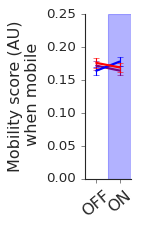

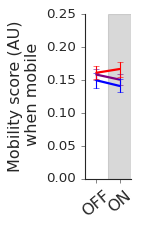

In [25]:
tst_chr2_speed = plot_movement_parameters_all(filename,'bout-movement','TST','ChR2',color='purple',ylim=[0,0.25],ytitle='Mobility score (AU)\n when mobile',
                                       figsize=(1.9,3),save=True,imgname='plots/TSTopto_ChR2_bout-speed.pdf')
tst_eyfp_speed = plot_movement_parameters_all(filename,'bout-movement','TST','eYFP',color='purple',laser_color='grey',ylim=[0,0.25],ytitle='Mobility score (AU)\n when mobile',
                                       figsize=(1.9,3),save=True,imgname='plots/TSTopto_eYFP_bout-speed.pdf')
plt.show()

There are missing values.
There are missing values.
There are missing values.
There are missing values.
There are missing values.


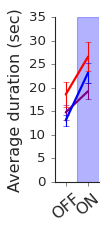

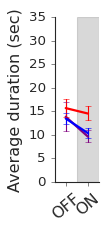

In [26]:
tst_chr2_duration = plot_movement_parameters_all(filename,'bout-mean-duration','TST','ChR2',color='purple',ylim=[0,35],ytitle='Average duration (sec)',
                                       figsize=(1.5,3),save=True,imgname='plots/TSTopto_ChR2_duration.pdf')
tst_eyfp_duration = plot_movement_parameters_all(filename,'bout-mean-duration','TST','eYFP',color='purple',laser_color='grey',ylim=[0,35],ytitle='Average duration (sec)',
                                       figsize=(1.5,3),save=True,imgname='plots/TSTopto_eYFP_duration.pdf')
plt.show()

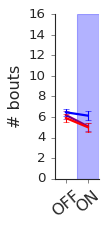

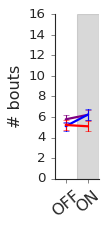

In [27]:
tst_chr2_number = plot_movement_parameters_all(filename,'bout-number','TST','ChR2',color='purple',ylim=[0,16],ytitle='# bouts',
                                       figsize=(1.5,3),save=True,imgname='plots/TSTopto_ChR2_number.pdf')
tst_eyfp_number = plot_movement_parameters_all(filename,'bout-number','TST','eYFP',color='purple',laser_color='grey',ylim=[0,16],ytitle='# bouts',
                                       figsize=(1.5,3),save=True,imgname='plots/TSTopto_eYFP_number.pdf')
plt.show()

#### OFT

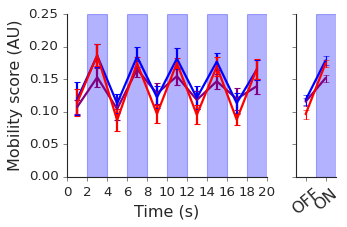

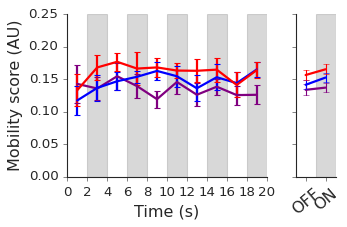

In [28]:
oft_chr2 = plot_movement_byperiods_all(filename,'mean-movement','OFT','ChR2',color='purple',ylim=[0,0.25],ytitle='Mobility score (AU)',
                                       save=True,imgname='plots/OFTopto_ChR2_total.pdf')
oft_eyfp = plot_movement_byperiods_all(filename,'mean-movement','OFT','eYFP',color='purple',laser_color='grey',ylim=[0,0.25],ytitle='Mobility score (AU)',
                                       save=True,imgname='plots/OFTopto_eYFP_total.pdf')
plt.show()

There are missing values.


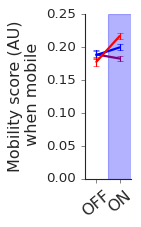

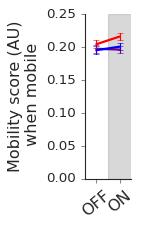

In [29]:
oft_chr2_speed = plot_movement_parameters_all(filename,'bout-movement','OFT','ChR2',color='purple',ylim=[0,0.25],ytitle='Mobility score (AU)\n when mobile',
                                       figsize=(1.9,3),save=True,imgname='plots/OFTopto_ChR2_bout-speed.pdf')
oft_eyfp_speed = plot_movement_parameters_all(filename,'bout-movement','OFT','eYFP',color='purple',laser_color='grey',ylim=[0,0.25],ytitle='Mobility score (AU)\n when mobile',
                                       figsize=(1.9,3),save=True,imgname='plots/OFTopto_eYFP_bout-speed.pdf')
plt.show()

There are missing values.


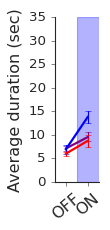

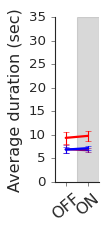

In [30]:
oft_chr2_duration = plot_movement_parameters_all(filename,'bout-mean-duration','OFT','ChR2',color='purple',ylim=[0,35],ytitle='Average duration (sec)',
                                       figsize=(1.5,3),save=True,imgname='plots/OFTopto_ChR2_duration.pdf')
oft_eyfp_duration = plot_movement_parameters_all(filename,'bout-mean-duration','OFT','eYFP',color='purple',laser_color='grey',ylim=[0,35],ytitle='Average duration (sec)',
                                       figsize=(1.5,3),save=True,imgname='plots/OFTopto_eYFP_duration.pdf')
plt.show()

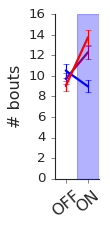

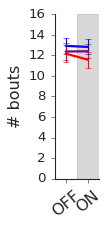

In [31]:
oft_chr2_number = plot_movement_parameters_all(filename,'bout-number','OFT','ChR2',color='purple',ylim=[0,16],ytitle='# bouts',
                                       figsize=(1.5,3),save=True,imgname='plots/OFTopto_ChR2_number.pdf')
oft_eyfp_number = plot_movement_parameters_all(filename,'bout-number','OFT','eYFP',color='purple',laser_color='grey',ylim=[0,16],ytitle='# bouts',
                                       figsize=(1.5,3),save=True,imgname='plots/OFTopto_eYFP_number.pdf')
plt.show()

### Save OFT-TST

In [39]:
oft_total = pd.concat([oft_chr2,oft_eyfp])
oft_speed = pd.concat([oft_chr2_speed,oft_eyfp_speed])
oft_duration = pd.concat([oft_chr2_duration,oft_eyfp_duration])
oft_number = pd.concat([oft_chr2_number,oft_eyfp_number])

tst_total = pd.concat([tst_chr2,tst_eyfp])
tst_speed = pd.concat([tst_chr2_speed,tst_eyfp_speed])
tst_duration = pd.concat([tst_chr2_duration,tst_eyfp_duration])
tst_number = pd.concat([tst_chr2_number,tst_eyfp_number])

In [ ]:
!pip install xlsxwriter
import xlsxwriter

In [41]:
writer = pd.ExcelWriter('../full submission 2/sourcedata/fig7_LHopto_OFT-TST.xlsx', engine='xlsxwriter')

oft_total.to_excel(writer,sheet_name='OFTtotal',index=False)
oft_speed.to_excel(writer,sheet_name='OFTmovement',index=False)
oft_duration.to_excel(writer,sheet_name='OFTduration',index=False)
oft_number.to_excel(writer,sheet_name='OFTnumber',index=False)

tst_total.to_excel(writer,sheet_name='TSTtotal',index=False)
tst_speed.to_excel(writer,sheet_name='TSTmovement',index=False)
tst_duration.to_excel(writer,sheet_name='TSTduration',index=False)
tst_number.to_excel(writer,sheet_name='TSTnumber',index=False)

writer.save()